In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
file = 'input/movies_dataset.csv'
data = pd.read_csv(file)

数据分析要求 
3.1 数据摘要和可视化 数据摘要 标称属性，给出每个可能取值的频数

数值属性，给出5数概括及缺失值的个数

数据可视化 使用直方图、盒图等检查数据分布及离群点

In [3]:
Nominal_Attribute = ['director', 'industry', 'language', 'title', 'writer']
print('标称属性:')
for attribute in Nominal_Attribute:
    print('-------------------------------------------------')
    print(attribute + ":")
    print(data[attribute].value_counts())

标称属性:
-------------------------------------------------
director:
director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: count, Length: 9672, dtype: int64
-------------------------------------------------
industry:
industry
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Mo

In [4]:
Number_Attribute = ['IMDb-rating', 'downloads', 'id', 'views']
def five_number(data):
    Min_num = min(data)
    Max_num = max(data)
    Q1_num = np.percentile(data, 25)
    Median_num = np.median(data)
    Q3_num = np.percentile(data, 75)
    return Min_num, Max_num, Q1_num, Median_num, Q3_num

print('数值属性:')

data['downloads'] = data['downloads'].str.replace(',', '').astype(float)
data['views'] = data['views'].str.replace(',', '').astype(float)

for attribute in Number_Attribute:
    print('-------------------------------------------------')
    print(attribute + ":")
    print('缺失值个数：')
    print(data[attribute].isnull().sum())
    print('五值概括:')
    print(five_number(data.dropna(subset=[attribute])[attribute]))


数值属性:
-------------------------------------------------
IMDb-rating:
缺失值个数：
841
五值概括:
(1.1, 9.9, 4.8, 5.7, 6.6)
-------------------------------------------------
downloads:
缺失值个数：
1
五值概括:
(0.0, 391272.0, 855.5, 2716.0, 10070.0)
-------------------------------------------------
id:
缺失值个数：
0
五值概括:
(1, 372092, 96122.25, 264457.5, 354561.25)
-------------------------------------------------
views:
缺失值个数：
1
五值概括:
(667.0, 1638533.0, 7571.5, 15222.0, 36571.0)


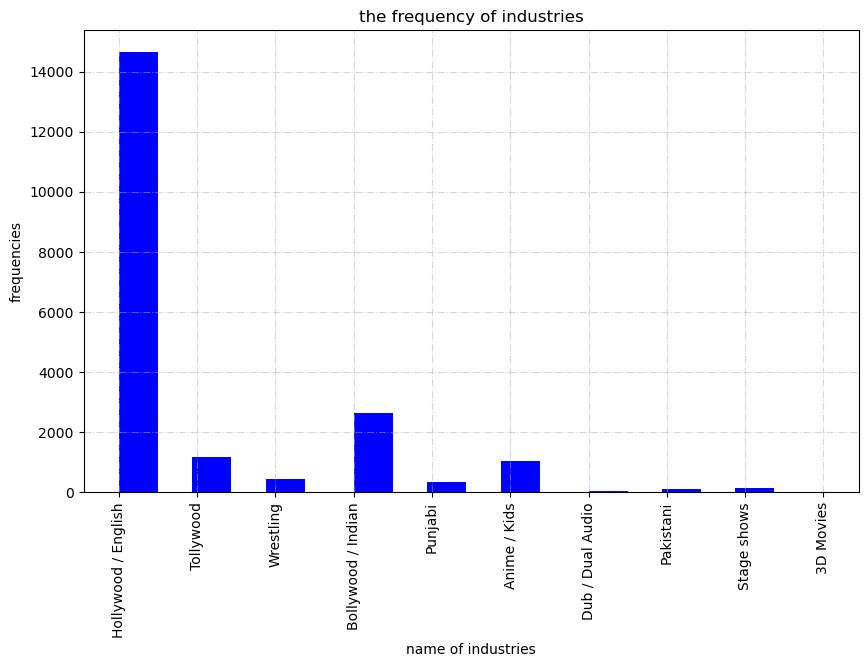

In [5]:
# histogram
# industry
plt.figure(num=1, figsize=(10,6))
sub_data = data.dropna(subset=['industry'])['industry']
plt.xticks(rotation=90)
plt.hist(sub_data, bins=48, width=0.5, color='blue')
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('name of industries')
plt.ylabel('frequencies')
plt.title(r'the frequency of industries')
plt.show()

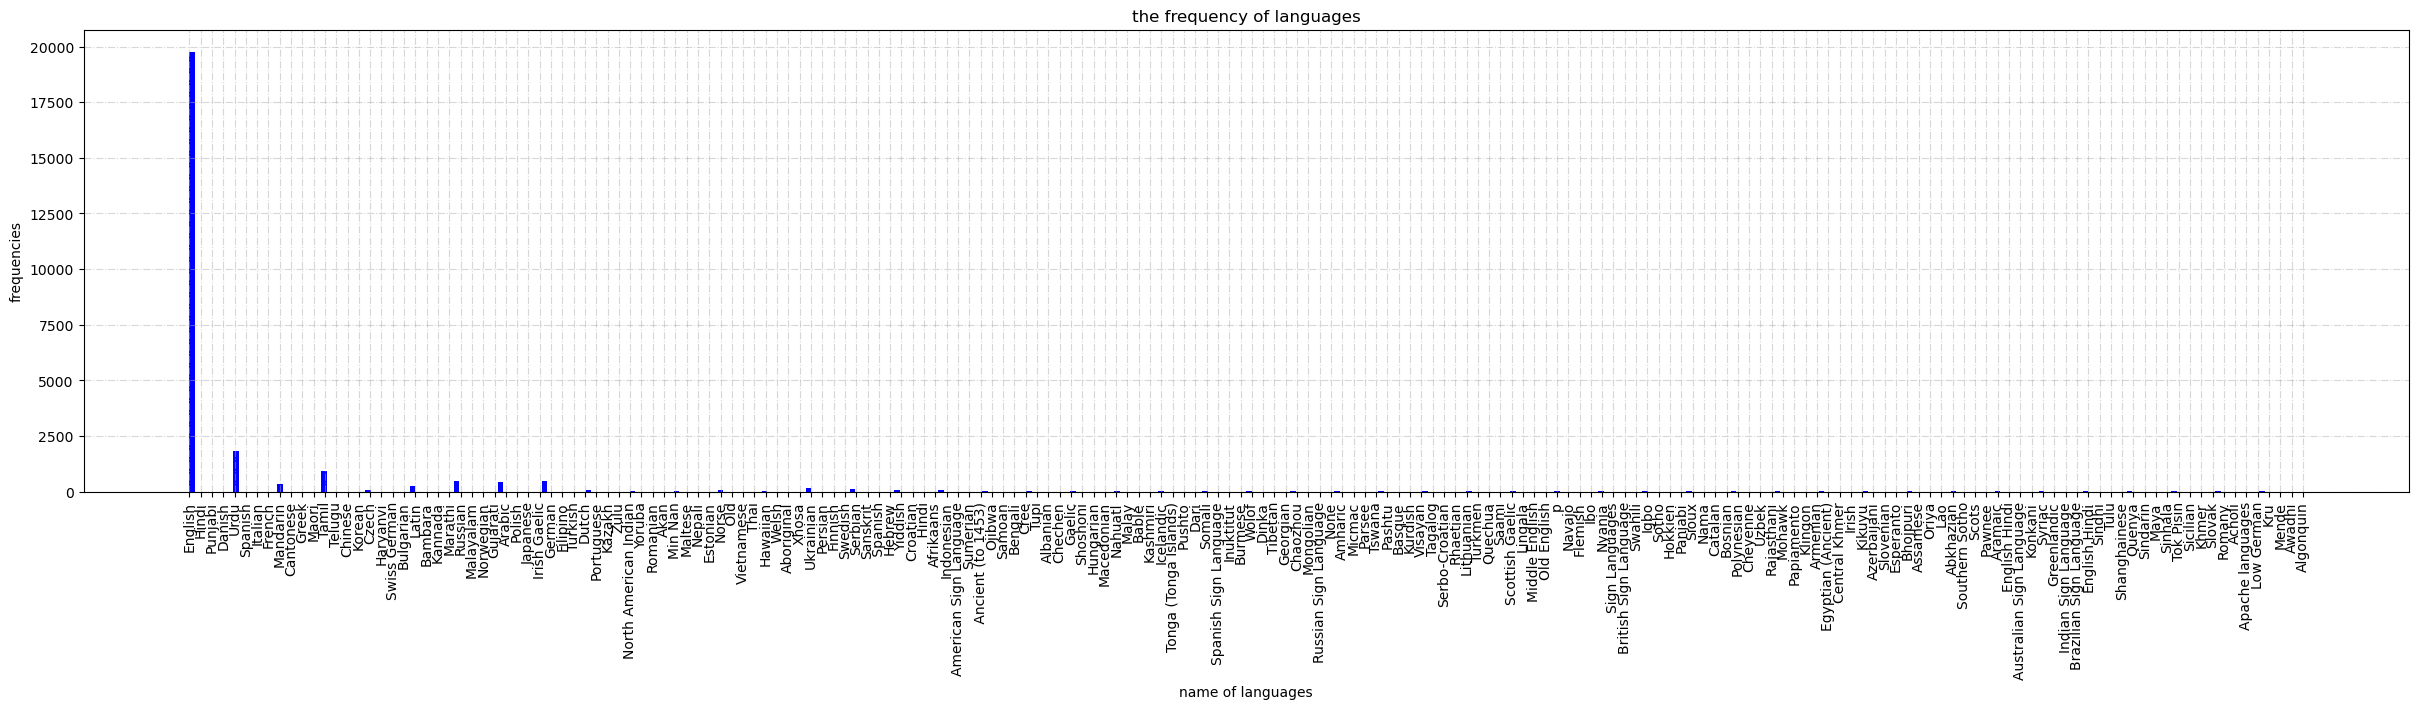

In [6]:
def generate_list(data, name):
    attr_list = []
    Attribute_list = data.dropna(subset=[name])[name]
    for attribute_list in Attribute_list:
        Attributes = attribute_list.strip().split(',')
        for attr in Attributes:
            attr_list.append(attr)
    return attr_list

# language
plt.figure(num=2, figsize=(30,6))
attr_list = generate_list(data, 'language')
plt.xticks(rotation=90)
plt.hist(attr_list, bins=48, width=0.5, color='blue')
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('name of languages')
plt.ylabel('frequencies')
plt.title(r'the frequency of languages')
plt.show()

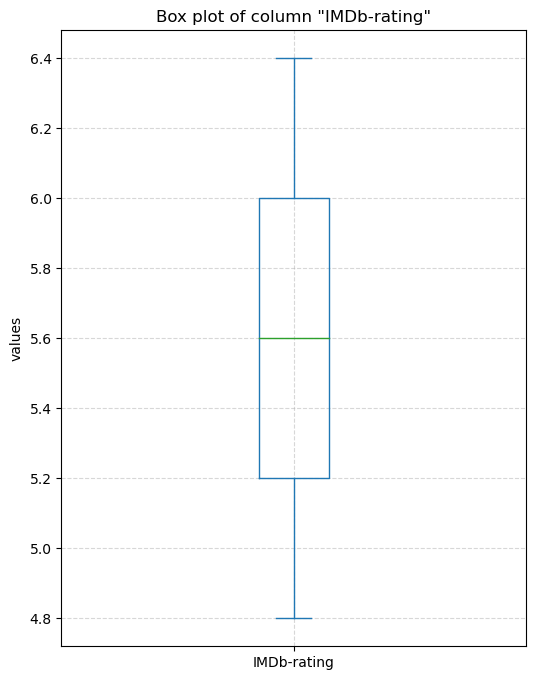

In [37]:
# box-plot picture
# IMDb-rating
plt.figure(num=3, figsize=(6, 8))
sub_data = data.dropna(subset=['IMDb-rating'])['IMDb-rating'][:2]
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "IMDb-rating"')
plt.show()

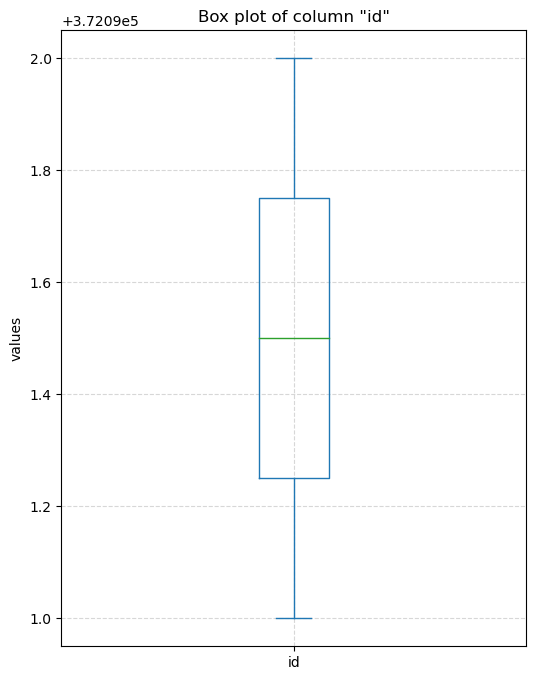

In [36]:
# id
plt.figure(num=5, figsize=(6, 8))
#data['id'] = data['id'].str.replace(',', '').astype(float)
sub_data = data.dropna(subset=['id'])['id'][:2]
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "id"')
plt.show()

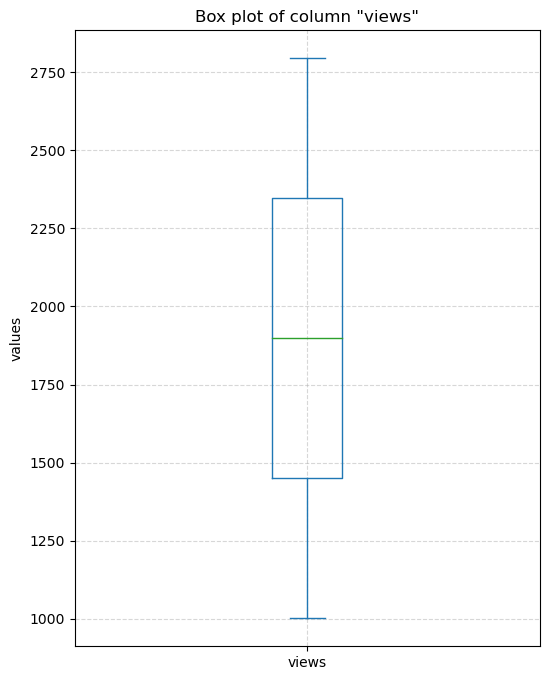

In [34]:
# views
plt.figure(num=6, figsize=(6, 8))
sub_data = data['views'][:2]
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "views"')
plt.show()

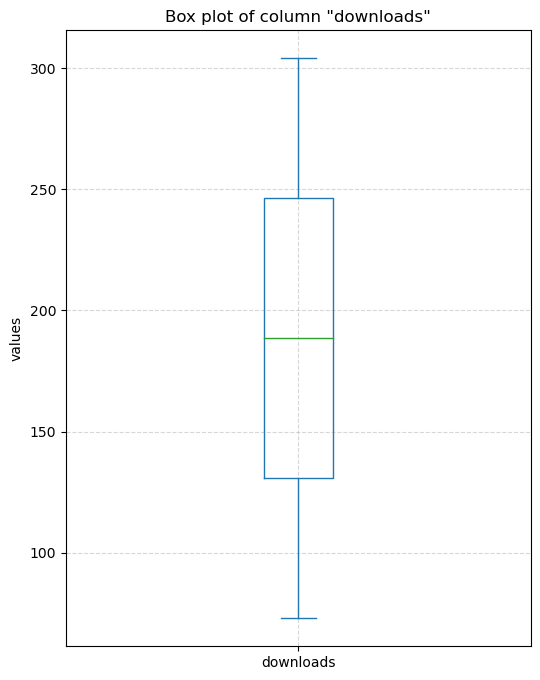

In [35]:
# downloads
plt.figure(num=4, figsize=(6, 8))
sub_data = data.dropna(subset=['downloads'])['downloads'][:2]
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "downloads"')
plt.show()


3.2 数据缺失的处理 观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

将缺失部分剔除 用最高频率值来填补缺失值 通过属性的相关关系来填补缺失值 通过数据对象之间的相似性来填补缺失值 注意：在处理后完成，要对比新旧数据集的差异。

In [17]:
# 缺失数据处理
print('缺失数据列表：')
data[data[['IMDb-rating']].isnull().T.any()].iloc[:10,]

缺失数据列表：


,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
6,6,NaN,TV-PG,NaN,5332.0,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978.0,NaN
12,12,NaN,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,NaN,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,16,NaN,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,NaN,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,18,NaN,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,NaN,NaN,TNA.Impact 2023-02-16,667.0,NaN
24,24,NaN,NaN,Sumeet Nagdev,1299.0,371932,Bollywood / Indian,Hindi,"16 Feb, 2023",Jan 21 2023,142,21-year\r\n old Vicky is diagnosed with mental...,Ho Ja Mukt,10891.0,Sumeet Nagdev
44,44,NaN,NaN,NaN,2609.0,371816,Wrestling,English,"14 Feb, 2023",Feb 13 2023,NaN,NaN,WWE Raw 2023-02-13,6605.0,NaN
55,55,NaN,NaN,NaN,1781.0,371740,Wrestling,English,"13 Feb, 2023",Feb 10 2023,NaN,NaN,WWE Smackdown 2023-02-10,4736.0,NaN
62,62,NaN,NaN,Anil Bhoop Sharma,1373.0,371670,Bollywood / Indian,Hindi,"10 Feb, 2023",Sep 08 2022,75,NaN,Subhagi,10318.0,"Munshi Premchand, Anil Bhoop Sharma"
63,63,NaN,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1337.0,NaN
77,77,NaN,NaN,NaN,3108.0,371517,Wrestling,English,"07 Feb, 2023",Feb 06 2023,NaN,NaN,WWE Raw 2023-02-06,8205.0,NaN


In [18]:
# 对缺失部分进行剔除
data1 = data.dropna()
print('缺失数据列表：')
data1[data[['IMDb-rating']].isnull().T.any()].iloc[:10,]

缺失数据列表：


,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer


In [19]:
# 用最高频率值来填补缺失值
data2 = data.copy(deep=True)
data2['IMDb-rating'] = data2['IMDb-rating'].fillna(np.median(data2.dropna(subset=['IMDb-rating'])['IMDb-rating']),inplace=False)
print('填充后的缺失数据列表：')
data2[data[['IMDb-rating']].isnull().T.any()].iloc[:10,]

填充后的缺失数据列表：


,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
6,6,5.7,TV-PG,NaN,5332.0,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978.0,NaN
12,12,5.7,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,NaN,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,16,5.7,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,NaN,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,18,5.7,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,NaN,NaN,TNA.Impact 2023-02-16,667.0,NaN
24,24,5.7,NaN,Sumeet Nagdev,1299.0,371932,Bollywood / Indian,Hindi,"16 Feb, 2023",Jan 21 2023,142,21-year\r\n old Vicky is diagnosed with mental...,Ho Ja Mukt,10891.0,Sumeet Nagdev
44,44,5.7,NaN,NaN,2609.0,371816,Wrestling,English,"14 Feb, 2023",Feb 13 2023,NaN,NaN,WWE Raw 2023-02-13,6605.0,NaN
55,55,5.7,NaN,NaN,1781.0,371740,Wrestling,English,"13 Feb, 2023",Feb 10 2023,NaN,NaN,WWE Smackdown 2023-02-10,4736.0,NaN
62,62,5.7,NaN,Anil Bhoop Sharma,1373.0,371670,Bollywood / Indian,Hindi,"10 Feb, 2023",Sep 08 2022,75,NaN,Subhagi,10318.0,"Munshi Premchand, Anil Bhoop Sharma"
63,63,5.7,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1337.0,NaN
77,77,5.7,NaN,NaN,3108.0,371517,Wrestling,English,"07 Feb, 2023",Feb 06 2023,NaN,NaN,WWE Raw 2023-02-06,8205.0,NaN


In [20]:
# 通过属性的相关关系来填补缺失值
data3 = data.copy(deep=True)
data3['IMDb-rating'] = data3['IMDb-rating'].interpolate()
print('处理后的缺失数据列表：')
data3[data[['IMDb-rating']].isnull().T.any()].iloc[:10,]

处理后的缺失数据列表：


,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
6,6,5.950000,TV-PG,NaN,5332.0,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978.0,NaN
12,12,7.800000,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,NaN,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,16,6.450000,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,NaN,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,18,5.550000,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,NaN,NaN,TNA.Impact 2023-02-16,667.0,NaN
24,24,6.350000,NaN,Sumeet Nagdev,1299.0,371932,Bollywood / Indian,Hindi,"16 Feb, 2023",Jan 21 2023,142,21-year\r\n old Vicky is diagnosed with mental...,Ho Ja Mukt,10891.0,Sumeet Nagdev
44,44,5.350000,NaN,NaN,2609.0,371816,Wrestling,English,"14 Feb, 2023",Feb 13 2023,NaN,NaN,WWE Raw 2023-02-13,6605.0,NaN
55,55,6.850000,NaN,NaN,1781.0,371740,Wrestling,English,"13 Feb, 2023",Feb 10 2023,NaN,NaN,WWE Smackdown 2023-02-10,4736.0,NaN
62,62,6.666667,NaN,Anil Bhoop Sharma,1373.0,371670,Bollywood / Indian,Hindi,"10 Feb, 2023",Sep 08 2022,75,NaN,Subhagi,10318.0,"Munshi Premchand, Anil Bhoop Sharma"
63,63,6.033333,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1337.0,NaN
77,77,5.900000,NaN,NaN,3108.0,371517,Wrestling,English,"07 Feb, 2023",Feb 06 2023,NaN,NaN,WWE Raw 2023-02-06,8205.0,NaN


In [21]:
# 通过数据对象之间的相似性来填补缺失值
data4 = data.copy(deep=True)
data4['IMDb-rating'] = data4['IMDb-rating'].fillna(np.mean(data4['IMDb-rating']),inplace=False)
print('处理后的缺失数据列表: ')
data4[data[['IMDb-rating']].isnull().T.any()].iloc[:10,]

处理后的缺失数据列表: 


,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
6,6,5.762151,TV-PG,NaN,5332.0,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978.0,NaN
12,12,5.762151,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,NaN,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,16,5.762151,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,NaN,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,18,5.762151,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,NaN,NaN,TNA.Impact 2023-02-16,667.0,NaN
24,24,5.762151,NaN,Sumeet Nagdev,1299.0,371932,Bollywood / Indian,Hindi,"16 Feb, 2023",Jan 21 2023,142,21-year\r\n old Vicky is diagnosed with mental...,Ho Ja Mukt,10891.0,Sumeet Nagdev
44,44,5.762151,NaN,NaN,2609.0,371816,Wrestling,English,"14 Feb, 2023",Feb 13 2023,NaN,NaN,WWE Raw 2023-02-13,6605.0,NaN
55,55,5.762151,NaN,NaN,1781.0,371740,Wrestling,English,"13 Feb, 2023",Feb 10 2023,NaN,NaN,WWE Smackdown 2023-02-10,4736.0,NaN
62,62,5.762151,NaN,Anil Bhoop Sharma,1373.0,371670,Bollywood / Indian,Hindi,"10 Feb, 2023",Sep 08 2022,75,NaN,Subhagi,10318.0,"Munshi Premchand, Anil Bhoop Sharma"
63,63,5.762151,NaN,NaN,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1337.0,NaN
77,77,5.762151,NaN,NaN,3108.0,371517,Wrestling,English,"07 Feb, 2023",Feb 06 2023,NaN,NaN,WWE Raw 2023-02-06,8205.0,NaN
